In [1]:
import pandas as pd 
import numpy as np

In [2]:
data=pd.read_csv('marketing_customer_analysis.csv')
data.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [3]:
data.columns=data.columns.astype("str")

In [4]:
data.columns=data.columns.map(str.upper)

In [5]:
data.columns

Index(['UNNAMED: 0', 'CUSTOMER', 'STATE', 'CUSTOMER LIFETIME VALUE',
       'RESPONSE', 'COVERAGE', 'EDUCATION', 'EFFECTIVE TO DATE',
       'EMPLOYMENTSTATUS', 'GENDER', 'INCOME', 'LOCATION CODE',
       'MARITAL STATUS', 'MONTHLY PREMIUM AUTO', 'MONTHS SINCE LAST CLAIM',
       'MONTHS SINCE POLICY INCEPTION', 'NUMBER OF OPEN COMPLAINTS',
       'NUMBER OF POLICIES', 'POLICY TYPE', 'POLICY', 'RENEW OFFER TYPE',
       'SALES CHANNEL', 'TOTAL CLAIM AMOUNT', 'VEHICLE CLASS', 'VEHICLE SIZE',
       'VEHICLE TYPE'],
      dtype='object')

In [6]:
num_col = data.select_dtypes(include=['float64']).columns
display(num_col)
cat_col = data.select_dtypes(include=['object']).columns
display(cat_col)

Index(['CUSTOMER LIFETIME VALUE', 'MONTHS SINCE LAST CLAIM',
       'NUMBER OF OPEN COMPLAINTS', 'TOTAL CLAIM AMOUNT'],
      dtype='object')

Index(['CUSTOMER', 'STATE', 'RESPONSE', 'COVERAGE', 'EDUCATION',
       'EFFECTIVE TO DATE', 'EMPLOYMENTSTATUS', 'GENDER', 'LOCATION CODE',
       'MARITAL STATUS', 'POLICY TYPE', 'POLICY', 'RENEW OFFER TYPE',
       'SALES CHANNEL', 'VEHICLE CLASS', 'VEHICLE SIZE', 'VEHICLE TYPE'],
      dtype='object')

In [7]:
data.columns[data.isna().any()].tolist()

['STATE',
 'RESPONSE',
 'MONTHS SINCE LAST CLAIM',
 'NUMBER OF OPEN COMPLAINTS',
 'VEHICLE CLASS',
 'VEHICLE SIZE',
 'VEHICLE TYPE']

In [8]:
data['month'] = pd.DatetimeIndex(data['EFFECTIVE TO DATE']).month
data.head()

,UNNAMED: 0,CUSTOMER,STATE,CUSTOMER LIFETIME VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE TO DATE,EMPLOYMENTSTATUS,GENDER,...,NUMBER OF POLICIES,POLICY TYPE,POLICY,RENEW OFFER TYPE,SALES CHANNEL,TOTAL CLAIM AMOUNT,VEHICLE CLASS,VEHICLE SIZE,VEHICLE TYPE,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1


In [9]:
data.dtypes

UNNAMED: 0                         int64
CUSTOMER                          object
STATE                             object
CUSTOMER LIFETIME VALUE          float64
RESPONSE                          object
COVERAGE                          object
EDUCATION                         object
EFFECTIVE TO DATE                 object
EMPLOYMENTSTATUS                  object
GENDER                            object
INCOME                             int64
LOCATION CODE                     object
MARITAL STATUS                    object
MONTHLY PREMIUM AUTO               int64
MONTHS SINCE LAST CLAIM          float64
MONTHS SINCE POLICY INCEPTION      int64
NUMBER OF OPEN COMPLAINTS        float64
NUMBER OF POLICIES                 int64
POLICY TYPE                       object
POLICY                            object
RENEW OFFER TYPE                  object
SALES CHANNEL                     object
TOTAL CLAIM AMOUNT               float64
VEHICLE CLASS                     object
VEHICLE SIZE    

In [10]:
print (data.isnull().sum())

UNNAMED: 0                          0
CUSTOMER                            0
STATE                             631
CUSTOMER LIFETIME VALUE             0
RESPONSE                          631
COVERAGE                            0
EDUCATION                           0
EFFECTIVE TO DATE                   0
EMPLOYMENTSTATUS                    0
GENDER                              0
INCOME                              0
LOCATION CODE                       0
MARITAL STATUS                      0
MONTHLY PREMIUM AUTO                0
MONTHS SINCE LAST CLAIM           633
MONTHS SINCE POLICY INCEPTION       0
NUMBER OF OPEN COMPLAINTS         633
NUMBER OF POLICIES                  0
POLICY TYPE                         0
POLICY                              0
RENEW OFFER TYPE                    0
SALES CHANNEL                       0
TOTAL CLAIM AMOUNT                  0
VEHICLE CLASS                     622
VEHICLE SIZE                      622
VEHICLE TYPE                     5482
month       

In [11]:
#########################################################################

In [34]:
data.describe() 

,UNNAMED: 0,CUSTOMER LIFETIME VALUE,INCOME,MONTHLY PREMIUM AUTO,MONTHS SINCE LAST CLAIM,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,TOTAL CLAIM AMOUNT,month
count,10910.000000,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330,1.466728
std,3149.590053,6885.081434,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556,0.498915
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,2727.250000,4014.453113,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527,1.000000
50%,5454.500000,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630,1.000000
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000,2.000000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [37]:
data.head(40)

,UNNAMED: 0,CUSTOMER,STATE,CUSTOMER LIFETIME VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE TO DATE,EMPLOYMENTSTATUS,GENDER,...,NUMBER OF POLICIES,POLICY TYPE,POLICY,RENEW OFFER TYPE,SALES CHANNEL,TOTAL CLAIM AMOUNT,VEHICLE CLASS,VEHICLE SIZE,VEHICLE TYPE,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1
5,5,HO81102,NaN,4745.181764,NaN,Basic,High School or Below,2/14/11,Employed,M,...,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A,2
6,6,IW72280,California,5035.035257,No,Basic,Doctor,2/14/11,Employed,F,...,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,NaN,2
7,7,IH64929,California,4956.247235,No,Basic,High School or Below,2/24/11,Employed,M,...,3,Personal Auto,Personal L2,Offer2,Branch,247.402353,Two-Door Car,Medsize,NaN,2
8,8,FM55990,California,5989.773931,Yes,Premium,College,1/19/11,Employed,M,...,1,Personal Auto,Personal L1,Offer2,Branch,739.200000,Sports Car,Medsize,NaN,1
9,9,QX31376,Oregon,17114.328150,No,Extended,Master,1/4/11,Employed,F,...,2,Corporate Auto,Corporate L3,Offer2,Agent,408.000000,Four-Door Car,Small,NaN,1


In [17]:
data['RESPONSE'].value_counts()

No     8813
Yes    1466
Name: RESPONSE, dtype: int64

<AxesSubplot:>

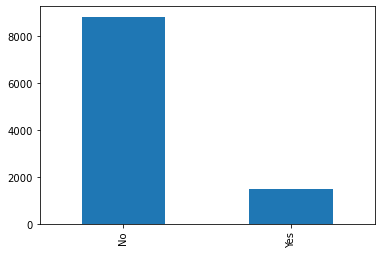

In [19]:
data['RESPONSE'].value_counts().plot (kind='bar')

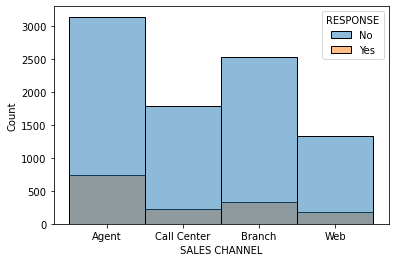

In [24]:
sns.histplot(x='SALES CHANNEL', hue='RESPONSE', data=data)
plt.show()

In [25]:
print(data['SALES CHANNEL'].value_counts())

Agent          4121
Branch         3022
Call Center    2141
Web            1626
Name: SALES CHANNEL, dtype: int64


In [28]:
df2=data['RESPONSE'].value_counts()/len(data) *100
print(round(df2,1))

No     80.8
Yes    13.4
Name: RESPONSE, dtype: float64


In [30]:
data2= data[['RESPONSE','TOTAL CLAIM AMOUNT']]
print (data2)

      RESPONSE  TOTAL CLAIM AMOUNT
0           No          292.800000
1           No          744.924331
2           No          480.000000
3          Yes          484.013411
4           No          707.925645
...        ...                 ...
10905       No         1214.400000
10906       No          273.018929
10907       No          381.306996
10908       No          618.288849
10909      NaN         1021.719397

[10910 rows x 2 columns]


<AxesSubplot:xlabel='TOTAL CLAIM AMOUNT'>

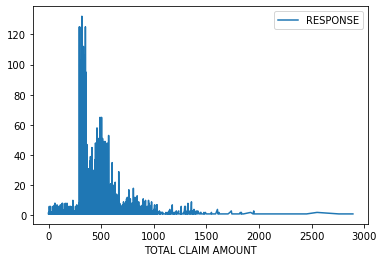

In [31]:
data2.groupby('TOTAL CLAIM AMOUNT').count().plot()

In [40]:
data3=data[['RESPONSE','INCOME']]
print(data3)

      RESPONSE  INCOME
0           No   48029
1           No       0
2           No   22139
3          Yes   49078
4           No   23675
...        ...     ...
10905       No       0
10906       No   61146
10907       No   39837
10908       No   64195
10909      NaN       0

[10910 rows x 2 columns]


<AxesSubplot:xlabel='INCOME'>

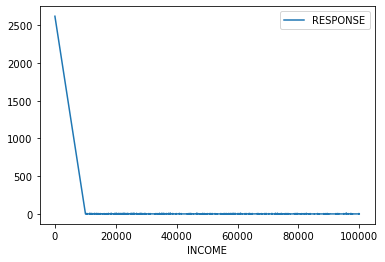

In [41]:
data3.groupby('INCOME').count().plot()

In [ ]:
# Last 2 questions im